In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

# クラス分類器の不確実性推定
クラス分類されたテストポイントに対して、その予測がどれくらい確かなものなのかを知りたい場合にはsklernのdecision_functionとpredict_probaを用いる

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

#わかりやすいようにクラスに名前をつけておく　
y_named = np.array(['bule', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y ,random_state=0)

In [17]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

## 決定関数
2クラス分類ではdecision_functionの結果の配列は(n_smaples,)の形になり、サンプルごとにひとつの浮動小数点が与えられる。  
あるデータポイントが陽性(この場合にはクラス1でred)であるとモデルが信じている度合いがエンコードされる。正であれば陽性クラスで負であれば陰性クラスを意味する.


In [20]:
print('X_test shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

X_test shape: (25, 2)
Decision function shape: (25,)


In [21]:
print('Decision function: {}'.format(gbrt.decision_function(X_test)[:6]))

Decision function: [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [22]:
#決定関数の値に鬪値を適用して真偽に分類
print('Threshold decision function: {}'.format(gbrt.decision_function(X_test)>0))
#予測結果
print('Predictions: \n{}'.format(gbrt.predict(X_test)))

Threshold decision function: [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions: 
['red' 'bule' 'bule' 'bule' 'red' 'red' 'bule' 'red' 'red' 'red' 'bule'
 'red' 'red' 'bule' 'red' 'bule' 'bule' 'bule' 'red' 'red' 'red' 'red'
 'red' 'bule' 'bule']


2クラス分類では陰性クラスがclasses_属性の第一エントリに、陽性クラスが第二エントリになる。

In [23]:
gbrt.classes_

array(['bule', 'red'], dtype='<U4')

In [25]:
#True/Flaseを0/1に変換する
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)
greater_zero

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [26]:
#0/1をclasses_属性に適用する
pred = gbrt.classes_[greater_zero]

In [27]:
#predはgbrt.prdictと同じ結果になる
print('pred is equal to predictions: {}'.format(np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions: True


decisoin_functionのレンジは決まっておらず、データとモデルに依存する  
したがってそれがないを意味するか解釈するのがが難しい

In [29]:
decision_function = gbrt.decision_function(X_test)
print('Decision function minmum : {:.2f}  maximum {:.2f}'.format(np.min(decision_function), np.max(decision_function)))

Decision function minmum : -7.69  maximum 4.29


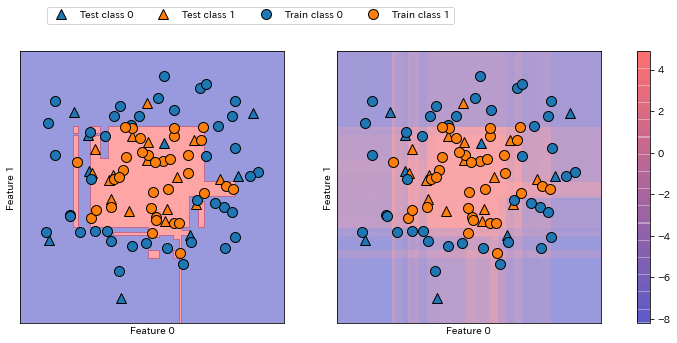

In [44]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image =mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    #訓練データとテストデータをプロットする
    mglearn.discrete_scatter(X_test[:, 0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

2次元データセットに対する勾配ブースティングモデルの決定境界(右)と決定関数(左)  
可視化しても2つのクラスの境界は分かりにくい。後述の予測確率と比べてみよう

## 確率の予測
predict_probaはそれぞれのクラスに属する確率でdecision_functionの出力よりも理解しやすい。  
2クラス分類では常に(n_samples, 2)となる。各行の第一エントリは第一クラスの予測確率で第二エントリは第二クラスの予測確率である。確率なので双方の和は1となる。

In [46]:
print('Shape of probabilities: {}'.format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [47]:
print('Predicted probabilities: \n{}'.format(gbrt.predict_proba(X_test)[:6]))

Predicted probabilities: 
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


このモデルの出力は比較的分類の確信度が高いことがわかる。出力されている確信度が実際のデータポイントに対する正答率を反映しているかは、モデルやパラメータに依存する。過剰適合したモデルは間違った分類でも確信度が高い出力をする可能性がたかい。あるモデルの報告の確信度が実際の正答率と一致している場合、そのモデルは較正(こうせい。calibrate)されているという。

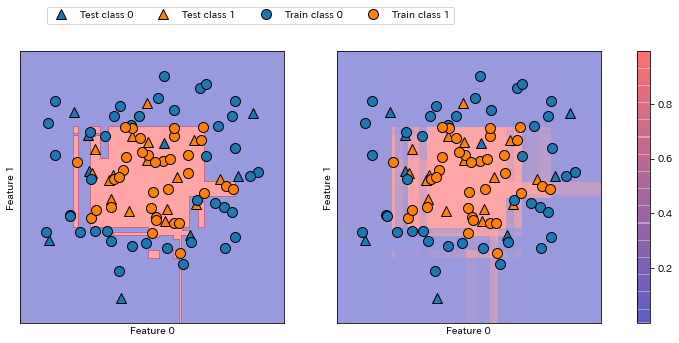

In [48]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
score_image =mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    #訓練データとテストデータをプロットする
    mglearn.discrete_scatter(X_test[:, 0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
cbar = plt.colorbar(score_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'], ncol=4, loc=(.1, 1.1))

勾配ブースティングモデルにおける決定境界(右)と予測確率(左)  
境界がはっきりしており、その境界における確信度が低い領域もよくわかる。